# Traffic Stops recorded in Charlotte, NC from 2019-2020 Visualized

## 1. Intent

##### For this project, we used the free public database provided by the City of Charlotte. This database features information on every traffic stop recorded from the beginning of 2019 to the end of 2020. Over the course of two years, we will analyze patterns and characteristics of the data to gain a perspective on traffic stops in Charlotte

## 2. Import data and view database

In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"C:\Users\Simon Democko\Documents\TrafficStopsCLT\Officer_Traffic_Stops.csv", parse_dates=['Month_of_Stop'])
data

,OBJECTID,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division
0,1,2020-01-01,Speeding,White,Male,27,White,Non-Hispanic,Female,38,No,Verbal Warning,University City Division
1,2,2019-04-01,Vehicle Regulatory,White,Male,4,White,Non-Hispanic,Female,25,No,Verbal Warning,Steele Creek Division
2,3,2019-08-01,Safe Movement,Not Specified,Male,3,Black,Non-Hispanic,Male,33,No,Verbal Warning,Independence Division
3,4,2019-10-01,Vehicle Regulatory,Black/African American,Male,25,Black,Non-Hispanic,Male,58,No,Verbal Warning,University City Division
4,5,2019-05-01,Driving While Impaired,White,Male,12,Asian,Non-Hispanic,Female,55,No,Verbal Warning,Eastway Division
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158915,158916,2019-04-01,SeatBelt,American Indian/Alaska Native,Male,12,White,Non-Hispanic,Male,30,No,No Action Taken,NaN
158916,158917,2020-01-01,Speeding,White,Male,10,Black,Non-Hispanic,Female,30,No,Citation Issued,NaN
158917,158918,2019-01-01,Safe Movement,,Male,2,Black,Non-Hispanic,Male,48,No,Verbal Warning,NaN
158918,158919,2020-01-01,Vehicle Equipment,White,Male,21,White,Hispanic,Male,48,No,Verbal Warning,NaN


#####  The database above features traffic stops recorded in Charlotte, North Carolina.

##### The City of Charlotte has these databases listed for public viewing. We are given the month of the stop, general information about the officer demographics, general information about the driver demographics, reason and outcome of the performed traffic stop, and the CMPD Division of which the traffic stop was recorded.

## 3. Visualization of Data

#####   Below we use Matplotlib and Python to integrate graphs based on the data provided.

##### We filter specific data out of the general database to record important aspects that show a clear purpose of analysis.

In [2]:
# General Label Formatting

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 22})

### 3.1. Line Graph displaying total number of traffic stops per month over the duration of the period (2019-2020)

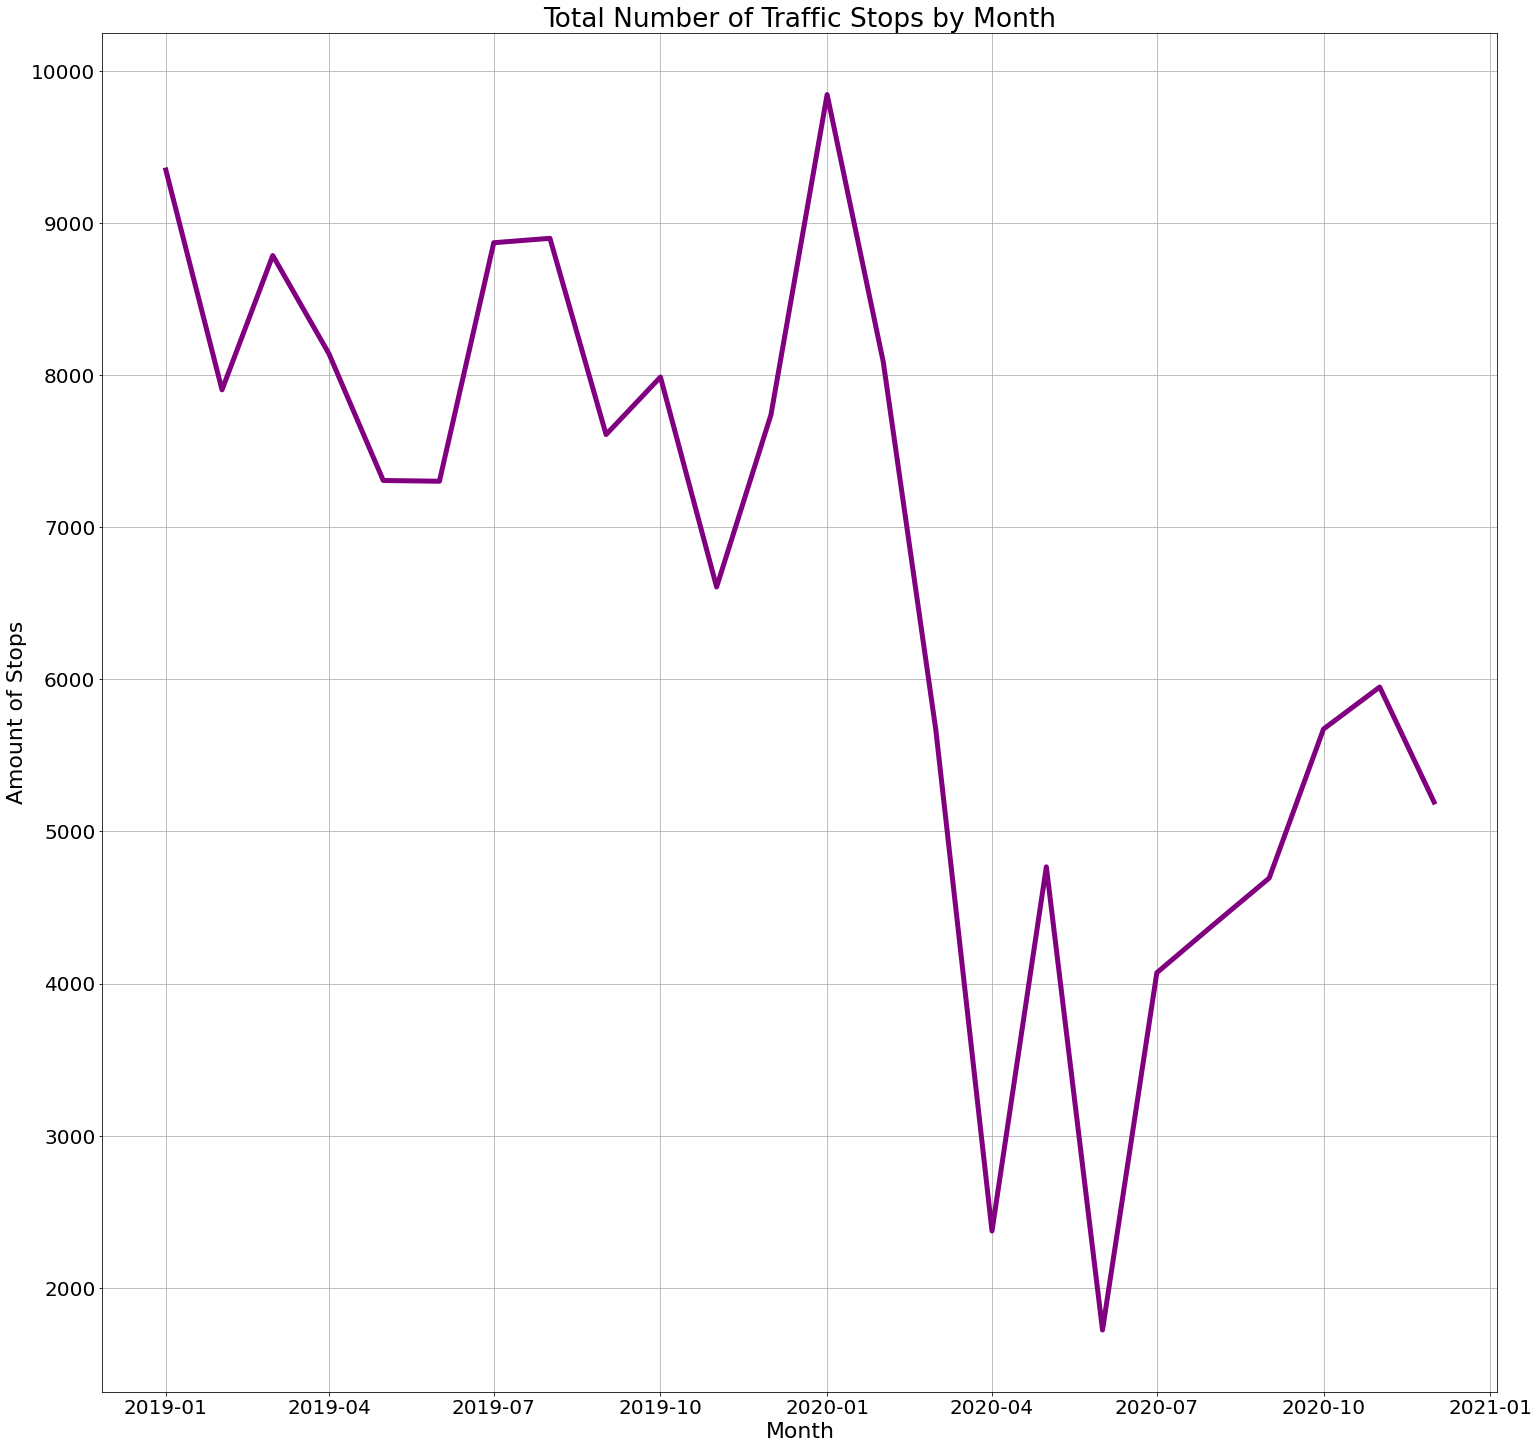

In [3]:
#set variables

data['Month'] = data['Month_of_Stop'].dt.date
month = data.groupby(['Month']).count()['OBJECTID']
month_stops = data.groupby(['Month']).count()

#plot Figure

plt.figure(figsize=(25,25))
plt.plot(month_stops.index, month, color='purple', linewidth=5)

#format figure and labels

plt.title('Total Number of Traffic Stops by Month')
plt.xlabel('Month')
plt.ylabel('Amount of Stops')
plt.grid()

In [14]:
month.describe()

count      24.000000
mean     6621.666667
std      2175.875090
min      1722.000000
25%      5086.500000
50%      7304.500000
75%      8099.750000
max      9844.000000
Name: OBJECTID, dtype: float64

#####  This line graph displays the total number of traffic stops recorded over the period of 2019-2020.
##### We can see the impact of the pandemic on total trafic stops recorded that begins around 2020-02. A significant decrease in traffic stops continues for a half-year and still maintains below average through the end of the year. This is most likely due to a decreased number of drivers on the road

###  3.2.  Pie Chart displaying the reasons that traffic stops were conducted

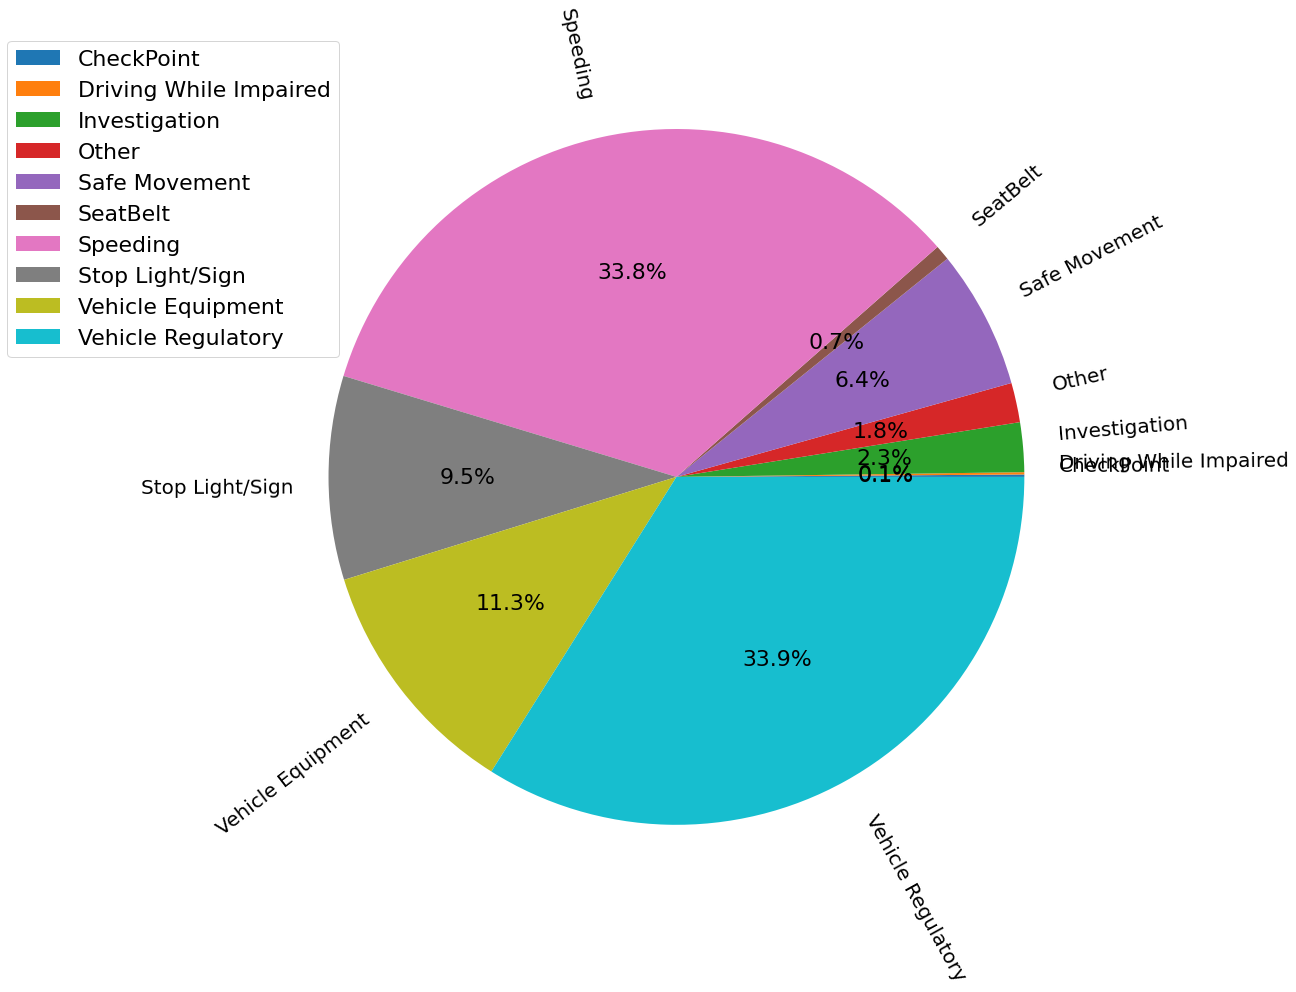

In [4]:
#set variables

stopreason = data.groupby(['Reason_for_Stop']).count()['OBJECTID']
labels = ('CheckPoint','Driving While Impaired','Investigation','Other','Safe Movement','SeatBelt','Speeding', 'Stop Light/Sign', 'Vehicle Equipment', 'Vehicle Regulatory')

# plot figure

plt.pie(stopreason, labels=labels, autopct='%1.1f%%', labeldistance=1.1, radius=4, rotatelabels=True)

# apply legend

sort_legend=True
plt.legend(bbox_to_anchor=(-1,1))

In [5]:
stopreason

Reason_for_Stop
CheckPoint                     177
Driving While Impaired         169
Investigation                 3655
Other                         2913
Safe Movement                10235
SeatBelt                      1117
Speeding                     53746
Stop Light/Sign              15044
Vehicle Equipment            17949
Vehicle Regulatory           53915
Name: OBJECTID, dtype: int64

#####  The pie chart displays information related to the reason that officers decided a traffic stop was necessary. The information is displayed as a percentage of total stops and the count of the reasons is displayed above as well.

##### The majority of traffic stops during the period were related to speeding and vehicle regulatory issues. 
#####  Surprisingly to me, seatbelt violations only accounted for 0.7% of total traffic stops recorded during the period. Only slightly over 1000 traffic stops were due to a missing seatbelt observed by the officer.
##### Thankfully, only 0.1% of traffic stops were due to driving while impared, accounting for a total of 169 traffic stops.

## 3.3. Box Plot of the driver's age 

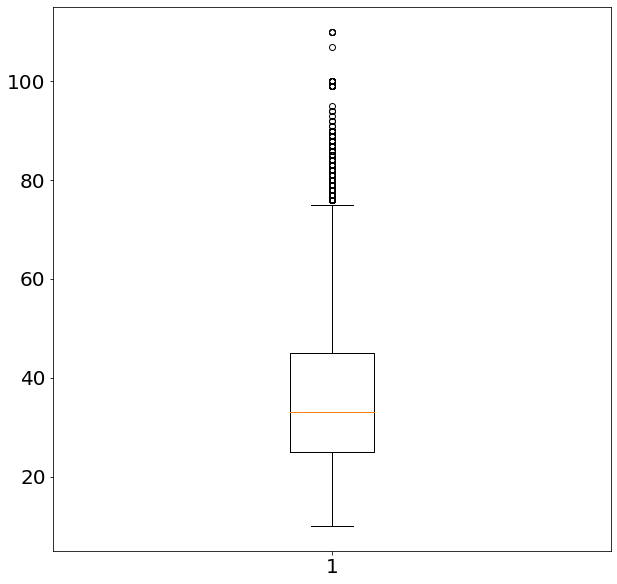

In [6]:
plt.figure(figsize=(10,10))
plt.boxplot(data['Driver_Age'])

sort_legend=True

In [7]:
data['Driver_Age'].describe()

count    158920.000000
mean         35.909445
std          13.022574
min          10.000000
25%          25.000000
50%          33.000000
75%          45.000000
max         110.000000
Name: Driver_Age, dtype: float64

##### The box plot shows imformation related to the statistics of the age of the driver who was pulled over for the traffic stop
##### Descriptive statistics are shown above as well. We see that the median age of the driver is 33 years old.
##### The minimum age of the drivers list is as low as 10 years old, and the maximum age is 110 years old.
##### There is approximatly a 13 year age difference between quartiles of the data shown.

## 3.4. Pie chart of the Officer and Driver gender

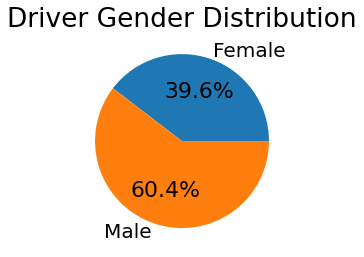

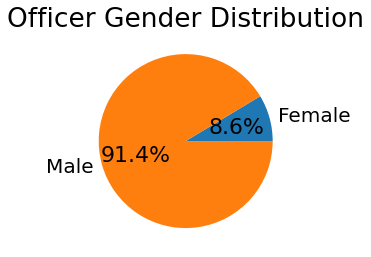

In [8]:
labels = ('Female','Male')

# plotting figure 1

plt.figure(0)

pie1 = data.groupby(['Driver_Gender']).count()['OBJECTID']
plt.pie(pie1, labels=labels, autopct='%1.1f%%')
plt.title('Driver Gender Distribution')

# plotting figure 2

plt.figure(1)

pie2 = data.groupby(['Officer_Gender']).count()['OBJECTID']
plt.pie(pie2, labels=labels, autopct='%1.1f%%')
plt.title('Officer Gender Distribution')


sort_legend=True

In [9]:
data.groupby(['Driver_Gender']).count()['OBJECTID']

Driver_Gender
Female    62937
Male      95983
Name: OBJECTID, dtype: int64

In [10]:
data.groupby(['Officer_Gender']).count()['OBJECTID']

Officer_Gender
Female     13709
Male      145211
Name: OBJECTID, dtype: int64

#####  The two pie charts above display the distribution of gender of both officer and driver. 
##### The percentage and counts of genders are displayed above as well
##### We see that around 60% of drivers for whom a traffic stop was conducted are Male, and 40% are female.
##### We also see that 91.4% of officers conducting stops are Male, while 8.6% of officers are Female.


## 3.5 Bar Chart displaying amount of traffic stops per CMPD Division

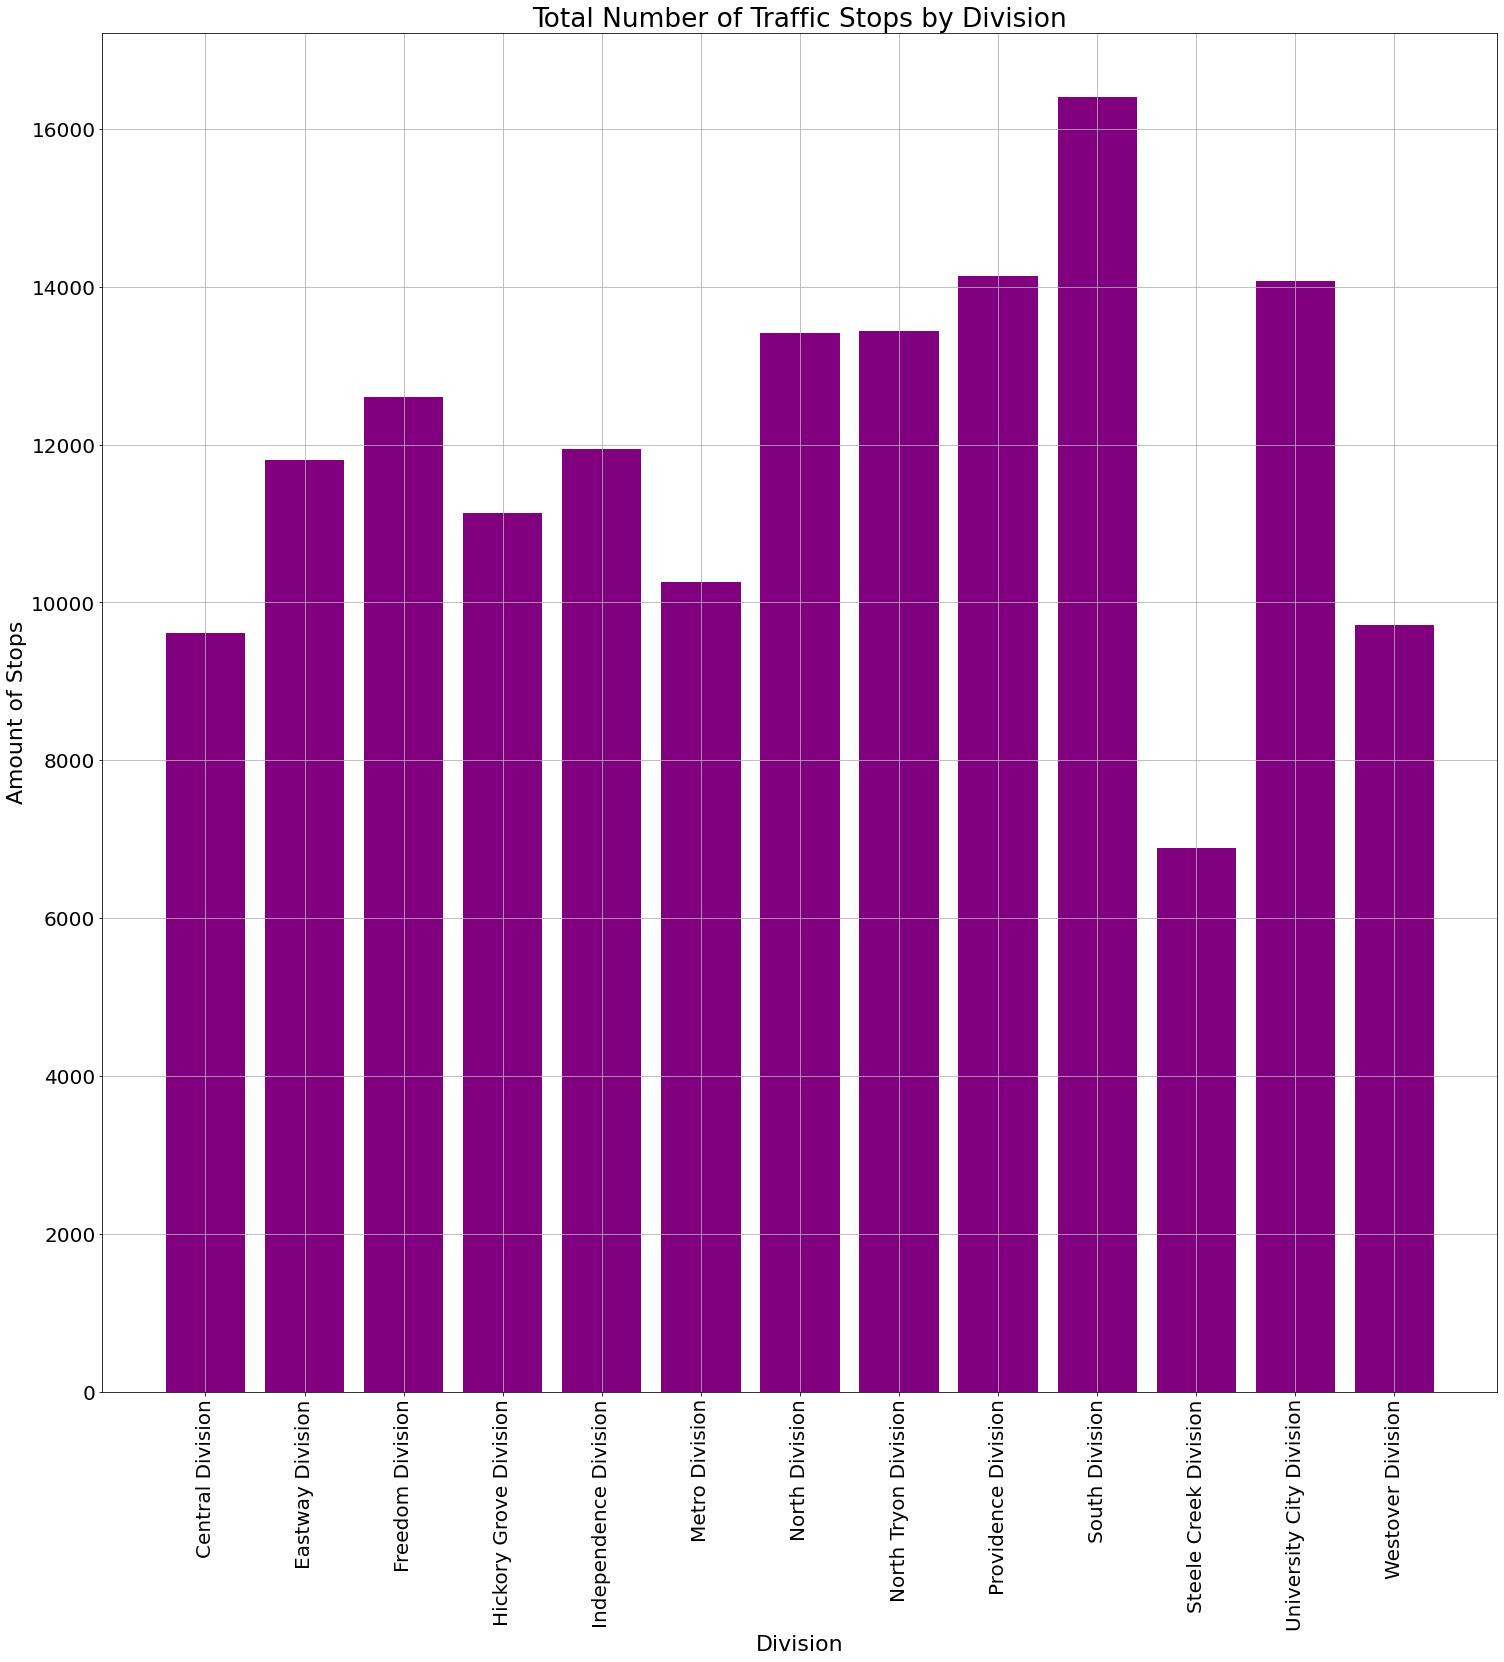

In [11]:
#set variables

div = data.groupby(['CMPD_Division']).count()['OBJECTID']
div_stops = data.groupby(['CMPD_Division']).count()

#plot Figure

plt.figure(figsize=(25,25))
plt.bar(div_stops.index, div, color='purple')

#format figure and labels

plt.title('Total Number of Traffic Stops by Division')
plt.xlabel('Division')
plt.ylabel('Amount of Stops')
plt.grid()
plt.xticks(rotation='vertical')

sort_legend=True

In [16]:
div

CMPD_Division
Central Division             9610
Eastway Division            11801
Freedom Division            12599
Hickory Grove Division      11126
Independence Division       11944
Metro Division              10254
North Division              13411
North Tryon Division        13435
Providence Division         14141
South Division              16400
Steele Creek Division        6885
University City Division    14073
Westover Division            9718
Name: OBJECTID, dtype: int64

In [12]:
div.describe()

count       13.000000
mean     11953.615385
std       2475.886459
min       6885.000000
25%      10254.000000
50%      11944.000000
75%      13435.000000
max      16400.000000
Name: OBJECTID, dtype: float64

#####  The above bar chart displays information related to the amount of stops that each CMPD Division conducted over the two year period
##### The average number of stops per division is around 12000 stops.
##### The Steele Creek Division is significantly below the average, while the South Division is above the average.

## 4. Conclusion

##### Through visualization of the database provided, we obtained a much clearer picture of the traffic stops recorded in the Charlotte area
##### We were able to filter the data appropriately to create graphs that are easily understood.
##### We used appropriate graphs based on the data filtered to obtain the most accurate representation of the data.
##### We obtained statistics on certain fields of data which can be used predictively to detect future trends.